In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 

  
# data (as pandas dataframes) 
df = pd.DataFrame(cervical_cancer_risk_factors.data.features, columns=cervical_cancer_risk_factors.data.feature_names)
# X = cervical_cancer_risk_factors.data.features 
# y = cervical_cancer_risk_factors.data.targets 

In [2]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [3]:
#drop na from df
#get adjusted df that is just age, hormonoal contraceptives, and target
df_adjusted = df[['Age', 'Hormonal Contraceptives (years)', 'Dx:Cancer']]
df_adjusted = df_adjusted.dropna()

In [4]:
df_adjusted

,Age,Hormonal Contraceptives (years),Dx:Cancer
0,18,0.00,0
1,15,0.00,0
2,34,0.00,0
3,52,3.00,1
4,46,15.00,0
...,...,...,...
853,34,0.00,0
854,32,8.00,0
855,25,0.08,0
856,33,0.08,0


In [19]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

In [6]:
#let X just be Age and Hormonal Contraceptives (years)
X = df_adjusted[['Age', 'Hormonal Contraceptives (years)']]
y = df_adjusted['Dx:Cancer']
#X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = ['Age', 'Hormonal Contraceptives (years)']

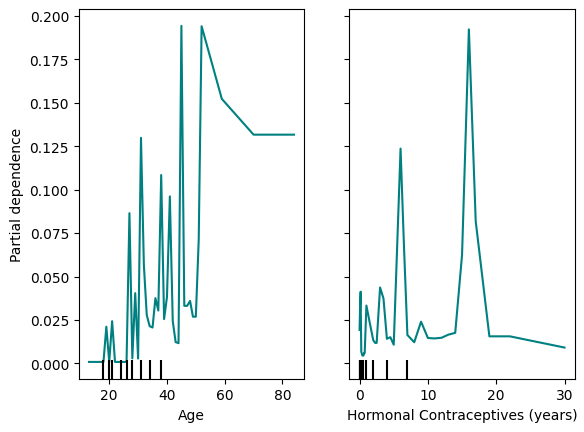

In [23]:
#random forest classifier as used in textbook
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X, y)
PartialDependenceDisplay.from_estimator(clf_rf, X, features)

In [7]:
clf

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

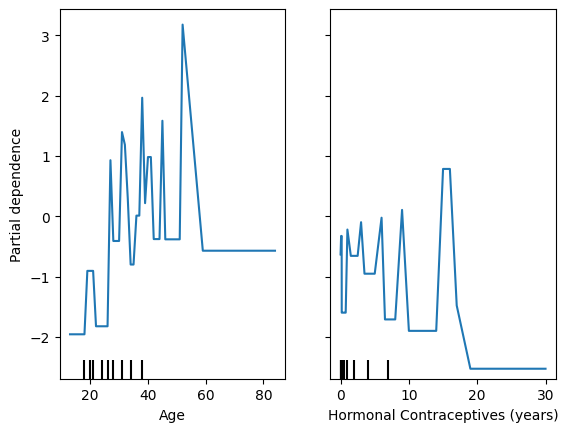

In [8]:
#pdp
PartialDependenceDisplay.from_estimator(clf, X, features)

In [9]:
#individual correlations of X features to y:
df_adjusted.corr()

,Age,Hormonal Contraceptives (years),Dx:Cancer
Age,1.000000,0.289783,0.107771
Hormonal Contraceptives (years),0.289783,1.000000,0.054712
Dx:Cancer,0.107771,0.054712,1.000000


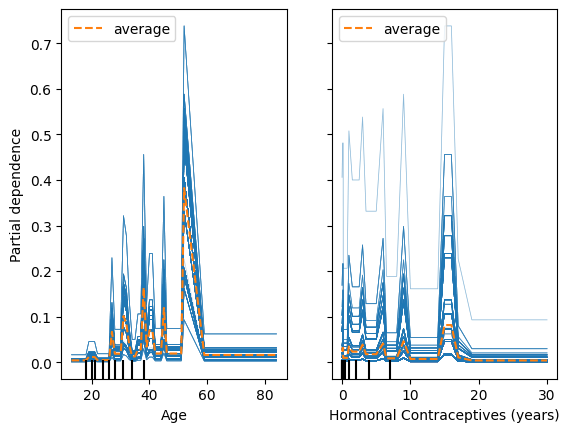

In [10]:
#ice (average line included)
PartialDependenceDisplay.from_estimator(clf, X, features,
                                        kind='both')

In [11]:
from ads.dataset.factory import DatasetFactory
from ads.common.model import ADSModel

/kuhpc/work/slusky/syasna_sta/.conda/envs/flax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from alibi.explainers import ALE, plot_ale

In [13]:
ale = ALE(clf.predict, feature_names = ['Age', 'Hormonal Contraceptives (years)'], target_names=['Dx:Cancer'])
ale

ALE(meta={
  'name': 'ALE',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'check_feature_resolution': True,
              'low_resolution_threshold': 10,
              'extrapolate_constant': True,
              'extrapolate_constant_perc': 10.0,
              'extrapolate_constant_min': 0.1}
            ,
  'version': '0.9.6'}
)

In [14]:
X_train = X.to_numpy()

In [ ]:
ale = ale.explain(X_train)

array([[<Axes: xlabel='Age', ylabel='ALE'>,
        <Axes: xlabel='Hormonal Contraceptives (years)', ylabel='ALE'>]],
      dtype=object)

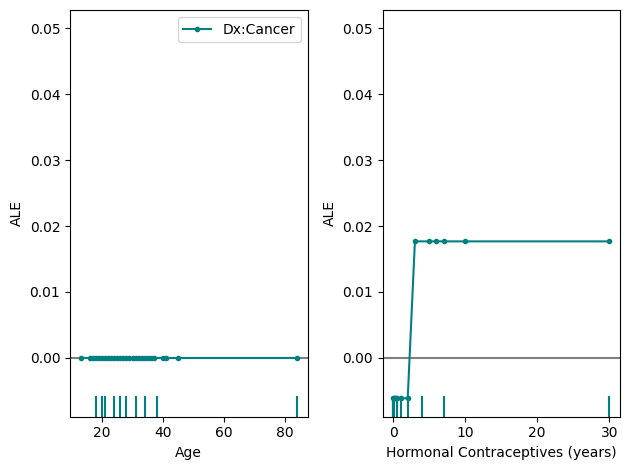

In [16]:
plot_ale(ale)

In [17]:
#clf performance confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[732,   0],
       [ 17,   1]])

In [18]:
df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085634,0.370017,0.548856,0.056139,0.218619,0.131946,0.068607,0.289783,0.280942,...,0.405929,0.485121,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085634,1.000000,-0.150169,0.079081,0.249441,0.186932,0.182067,0.006738,0.019569,0.031683,...,0.051825,0.077992,0.022316,0.015694,0.027273,0.022992,-0.039847,-0.008967,0.021858,-0.001442
First sexual intercourse,0.370017,-0.150169,1.000000,-0.060733,-0.124642,-0.058834,-0.056755,0.019436,0.008308,-0.022450,...,0.063774,0.089370,0.067289,-0.032628,0.043970,0.035755,-0.016549,0.003495,-0.010973,0.007264
Num of pregnancies,0.548856,0.079081,-0.060733,1.000000,0.084171,0.180331,0.100904,0.156730,0.224790,0.219104,...,0.216764,0.276249,0.035149,0.010985,0.046788,0.021336,0.040439,0.092017,-0.030036,0.046416
Smokes,0.056139,0.249441,-0.124642,0.084171,1.000000,0.723128,0.493361,-0.002298,0.047588,-0.056232,...,0.072493,0.079909,-0.011342,-0.042825,0.012558,-0.069042,0.035021,0.054322,-0.003957,0.029356
Smokes (years),0.218619,0.186932,-0.058834,0.180331,0.723128,1.000000,0.724116,-0.011571,0.050979,0.029413,...,0.159106,0.164345,0.056234,-0.030968,0.058847,-0.049926,0.072251,0.095890,-0.006827,0.062044
Smokes (packs/year),0.131946,0.182067,-0.056755,0.100904,0.493361,0.724116,1.000000,0.006049,0.041278,0.008277,...,0.195085,0.199611,0.111572,-0.021128,0.113516,-0.034063,0.027044,0.018191,0.004666,0.024882
Hormonal Contraceptives,0.068607,0.006738,0.019436,0.156730,-0.002298,-0.011571,0.006049,1.000000,0.448574,0.034004,...,0.077391,0.132553,0.026447,-0.003536,0.039175,-0.001801,0.033654,-0.004276,-0.011317,0.007750
Hormonal Contraceptives (years),0.289783,0.019569,0.008308,0.224790,0.047588,0.050979,0.041278,0.448574,1.000000,0.099001,...,0.317807,0.361243,0.054712,0.003273,0.063229,-0.013446,0.038945,0.079247,0.076263,0.079388
IUD,0.280942,0.031683,-0.022450,0.219104,-0.056232,0.029413,0.008277,0.034004,0.099001,1.000000,...,0.176076,0.206584,0.110728,0.063405,0.059900,0.152086,0.044821,0.085748,0.007628,0.053194
